# Week 5-Test the null hypothesis And alternate hypothesis

# Hypothesis Testing
Hypothesis testing is a statistical method that is used in making statistical decisions using experimental data. Hypothesis Testing is basically an assumption that we make about the population parameter.
This report aims at understanding and applying **Hypothesis testing** methods such as <br>
1.  **Normal Distribution**<br>
2. **Student t Distribution**<br>
3. **type 1 and type 2 errors**<br>
4. **ANOVA**<br>
So let's get started

In [34]:
# import package
%matplotlib inline
import pandas as pd
import numpy as np
import statistics
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [10]:
import warnings

warnings.filterwarnings('ignore')

In [13]:
# Import data
payroll = pd.read_csv('data.csv')

In [33]:
payroll.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job_title,Employment Type,Hourly or Event Rate,Annual_sal,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,47911.51,13493.87,...,SERVICE EMPLOYEES UNIT,4,3156,A,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3156.pdf


**Data Cleansing**

In [15]:
payroll = payroll[pd.notnull(payroll['Payroll Department'])]
payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [17]:
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    payroll[i] = payroll[i].str.replace('$','')

**Outlier removal**

In [18]:
payroll = payroll[payroll.Annual_sal != 0]  
payroll = payroll[payroll.Base_Pay != 0]
payroll.Annual_sal = payroll.Annual_sal.astype(float)
payroll.Base_Pay = payroll.Base_Pay.astype(float)

<AxesSubplot:xlabel='Annual_sal', ylabel='Density'>

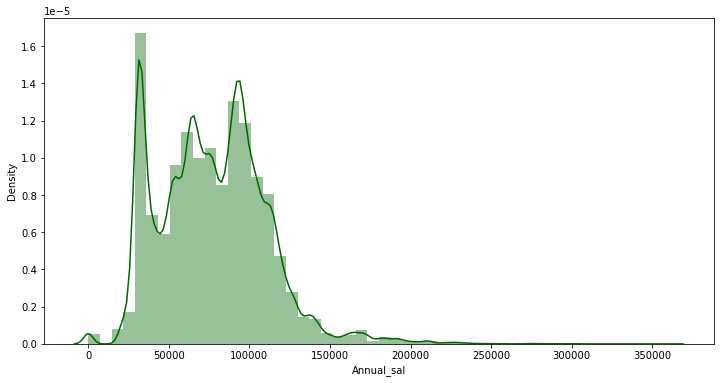

In [19]:
plt.figure(figsize = (12,6))
sns.distplot(payroll.Annual_sal,color = 'darkgreen')

**Creating different Sample from the population**

In [20]:
payroll_2015 = payroll[payroll.Year ==2015]
payroll_2016 = payroll[payroll.Year ==2016]

**Calculating the Population Parameters**

In [21]:
pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


**Calculating the Sample Parameters**

In [23]:
print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 78954.56516485884
Sample Standard Deviation: 33856.35847070621


<b>Hypothesis Testing</b>

<b>Normal distribution</b>

<b>Null Hypothesis :</b> It increases in 2016

<b>Alternate Hypothesis: </b>Pay does not increase in 2016

<b>Population parameters:</b> Mean = pop_mean_2015, standard deviation = pop_std_2015

<b>Sample parameters :</b> Mean = sample_mean_2016, standard deviation = sample_std_2016

In [25]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

8.110826644222016


<b>Conclusion:</b> As the test statistics fall into the rejection region the null hypothesis is rejected
and it can be concluded that the Annual salaries increase in 2016.
However, we will first check for the Type 1 and Type 2 Errors

# Type 1 type 2 hypothesis error
<b>Type I error:</b> When we reject the null hypothesis, although that hypothesis was true. Type I error is denoted by alpha. In hypothesis testing, the normal curve that shows the critical region is called the alpha region

<b>Type II errors:</b> When we accept the null hypothesis but it is false. Type II errors are denoted by beta. In Hypothesis testing, the normal curve that shows the acceptance region is called the beta region.

In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").

In [26]:
# we are basically checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)

0.07937359898019851


We can clearly see that we encountered a Type 1 error as the population mean is well within acceptable region

<b>Student T-distribution</b>

<b>Null Hypothesis:</b> pay  increase in 2016

<b>Alternate Hypothesis: </b>it did  not increases in 2016

<b>Population parameters:</b> Mean = pop_mean_2015, standard deviation = pop_std_2015
    
<b>Sample parameters :</b> Mean = sample_mean_2016, standard deviation = sample_std_2016

In [28]:
#Calculating the Sample Parameters**
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2015 = payroll[payroll.Year ==2015]
# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [29]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [30]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculate the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

print(tscore_test_stat)

-0.06225377791500011


Depending on the Test score , we can accept/Reject the Null

<b>** F Distribution and ANOVA </b>

The means from three different samples are compared using ANOVA
It is similar to applying t-tests over multiple sample ANOVA : https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php

In [31]:
payroll_2014 = payroll[payroll.Year ==2014]
payroll_2014_elec = payroll_2014[payroll_2014.Job_title == 'Electrician']
payroll_2015_elec = payroll_2015[payroll_2015.Job_title == 'Electrician']
payroll_2016_elec = payroll_2016[payroll_2016.Job_title == 'Electrician']
sample_elec_2014 = payroll_2014_elec.sample(frac=0.47)
sample_elec_mean_2014 = sample_elec_2014['Base_Pay'].mean()
print("Sample Mean 2014 "+str(sample_elec_mean_2014))
sample_elec_2015 = payroll_2015_elec.sample(frac=0.41)
sample_elec_mean_2015 = sample_elec_2015['Base_Pay'].mean()
print("Sample Mean 2015 "+str(sample_elec_mean_2015))
sample_elec_2016 = payroll_2016_elec.sample(frac=0.22)
sample_elec_mean_2016 = sample_elec_2016['Base_Pay'].mean()
print("Sample Mean 2016 "+str(sample_elec_mean_2016))
# Creating the Samples of the base pays over three years
sam_1 = sample_elec_2014.Base_Pay
sam_2 = sample_elec_2015.Base_Pay
sam_3 = sample_elec_2016.Base_Pay

Sample Mean 2014 67878.53171428571
Sample Mean 2015 65304.96400000001
Sample Mean 2016 34002.21742857143


In [32]:
f, p = stats.f_oneway(sam_1, sam_2, sam_3 )
print ('F value:', f)
print ('P value:', p, '\n')

F value: 24.629006946921248
P value: 1.8748679645638236e-09 



P value is very low, hence null hypothesis is rejected

